# <img src='https://www.rc.colorado.edu/sites/all/themes/research/logo.png' style="height:75px">

 <h1> Making Better Plots with Matplotlib </h1>
 <p>
 
Thursday 22 October 2015

<h3> Overview of Tutorial </h3>

*  We will present Matplotlib
*  We will provide useful examples of basic plots - and provide a sample of more advanced capabilities 
*  You should be comfortable with Python and the iPython Notebook
*  Follow along with your copy of the iPython Notebook
   

<h3> Gallery </h3>

*  Look at: http://matplotlib.org/gallery.html

<h3> References </h3>
*  http://matplotlib.org/api/pyplot_api.html
*  http://matplotlib.org/users/pyplot_tutorial.html
*  http://matplotlib.org/examples/color/colormaps_reference.html
*  Use <i>help (whatever)</i> command

<h3> Agenda </h3>
* Why the fuss?
* 2D Plotting
   - Images
   - Contour Plots
   - Quiver Plots
   - Streamline Plots
   - pColor
* 3D Plotting
    - Contours
    - Meshes
    - 3D Time Series Plotting
        
    

<h1> Why the fuss?</h1><br>
Whats the big deal with plotting and is there really something I don't know?

<img src='ThousandWords_1.png' style="height:400px">
<center><h3>Whats wrong with this plot?</h3></center>

<h4> What will make it better? </h4>
* Title
* Axis information
   - Tick labels
   - Axis labels
   - Units
   - Credits
<br><br><br><br>

   

<img src='ThousandWords_2.png' style="height:400px">
<center><h4>Is this still the best that can be done to convey all pertinent information?</h4></center>

<h1> 2D Plots</h1>
<h2> - Images part 1: Loading and displaying</h2>
Images in the normal rgb formats such as .jpg, .png, .bmp, .tiff, ect can be loaded and displayed using imshow().<br>
We will load an image file called topo.png generate from NASA's 'BigBlueMarble' and display it.

In [1]:
%matplotlib inline

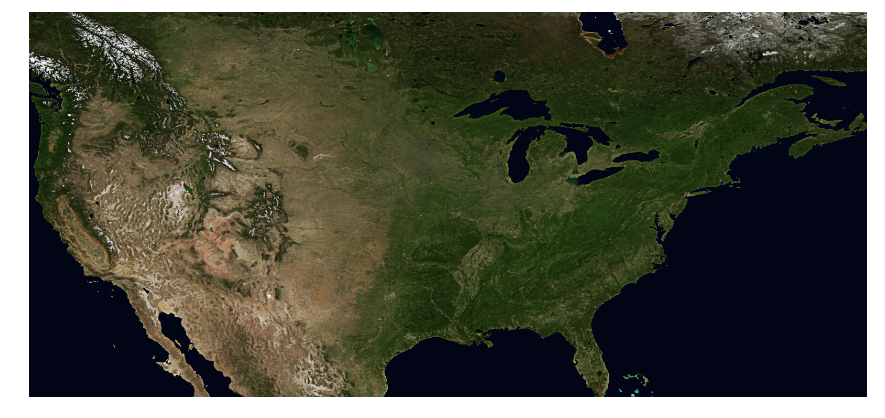

In [2]:
import matplotlib.pyplot as plt           # Import the ploting package as an instance named plt
import numpy as np                        # Import numpy as an instance named np

ifName = 'topo.png'                       # Name of image file to load
img = plt.imread(ifName)                  # Read in the image file

fig, ax = plt.subplots(figsize=(15, 15))  # Create a figure and set it's size
plt.axis('off')                           # Turn the axes and axes labels off
iplt = plt.imshow(img)                    # Display the image using imshow

plt.show()                                # Display the plot

<h2> - Images part 2: Data manipulation and Colormaps</h2>
Since an image is just a specialized matrix we can manipulate the matrix to provide new information buried in the image. For our example we will create a luminosity map and 'pretend' that it represents a normalized surface albedo, ignoring the fact that water actually has a high albedo. We will then color the luminosity map creating an albedo heat map.
<br><br>
NOTE: We are using some of the varibles from the previous section of code.

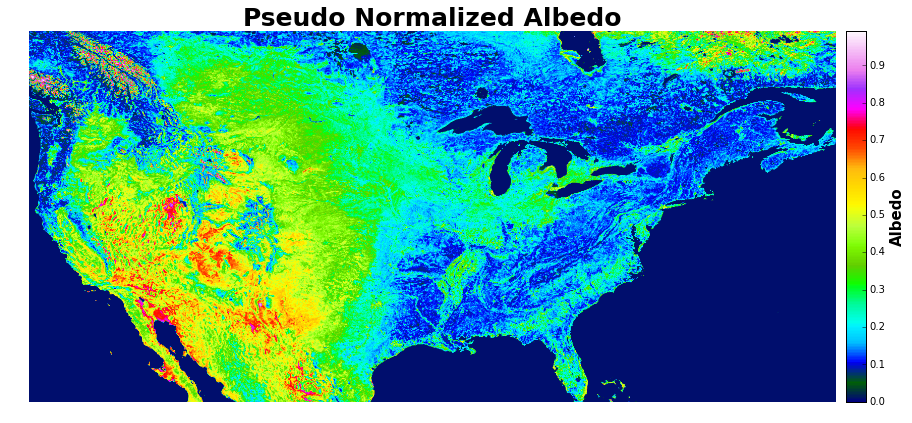

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))                           # Create a figure and set it's size
clrMap = 'gist_ncar'                                               # Define the colormap we will use
lum_img = img[:,:,0]                                               # Create a luminosity map
plt.axis('off')                                                    # Turn the axes and axes labels off
iplt = plt.imshow(lum_img)                                         # Display the luminosity image
iplt.set_cmap(clrMap)                                              # Set colormap
plt.title('Pseudo Normalized Albedo',size = 25, weight = 'bold')   # Give the plot a title

plt.colorbar(shrink=.3)                                            # Simple and ugly way to set colorbar

#Better method for adding a colorbar to an image
#from mpl_toolkits.axes_grid1 import make_axes_locatable as mal     # Import the axes library
#div = mal(ax)                                                      # Divide our original axes to add new item
#cax = div.append_axes("right", size="2.5%", pad=0.15)              # Add new axes attached to our original
#cbar = plt.colorbar(iplt, cax=cax)                                 # Attach a colorbar to the new axes
#cbar.set_label('Albedo',size = 15, weight = 'bold')                # Give the colorbar a title


<h2> - Images part 3: Adding a histogram</h2>
You often want to add more information about the plot alongside it. In our case we will display a histogram showing the number of grid points per bin (using 256 bins) where each bin is a normalized albedo value.

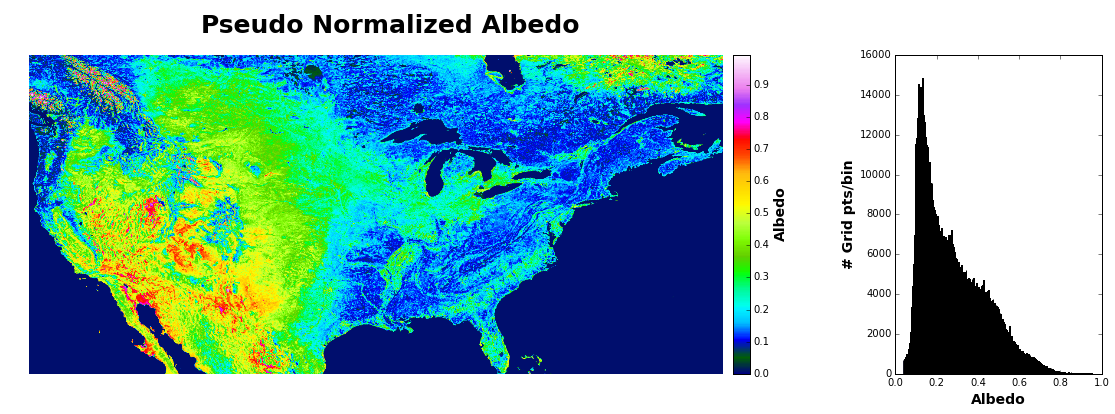

In [24]:
import matplotlib.gridspec as gridspec

lblsize = 14                                                             # Label font size

gs = gridspec.GridSpec(1,2, width_ratios=[2,.51],height_ratios=[1,2.5])  # Create a grid layout w/ 2 columns
fig = plt.figure(figsize=(20,20))                                        # Create the main figure and set it's size

#Subplot 1 - Luminosity map
ax1 = fig.add_subplot(gs[0])                                             # Create the first subplot
iplt = ax1.imshow(lum_img)                                               # Display the luminosity image
ax1.axis('off')                                                          # Turn the axes and axes labels off
iplt.set_cmap(clrMap)                                                    # Set colormap

div = mal(ax1)                                                           # Divide our original axes to add new item
cax = div.append_axes("right", size="2.5%", pad=0.15)                    # Add new axes attached to our original
cbar = plt.colorbar(iplt, cax=cax)                                       # Attach a colorbar to the new axes
cbar.set_label('Albedo',size=lblsize, weight='bold')                     # Give the colorbar a title

#Subplot 2 - Histogram
ax2 = fig.add_subplot(gs[1])                                             # Create the first subplot
a = ax2.hist(lum_img.flatten(), 256, range=(0.04,1.0))                   # Create a histogram and clip the near 0 values
ax2.set_xlabel('Albedo',fontsize=lblsize, weight='bold')                 # Set xaxis label
ax2.set_ylabel('# Grid pts/bin',fontsize=lblsize, weight='bold')         # Set yaxis label

#plt.suptitle('Pseudo Normalized Albedo',size=25, weight='bold')         # Simple and ugly way to set full figure title

#Better way to set a full figure title
fig.get_axes()[0].annotate('Pseudo Normalized Albedo', 
                            (0.18, 0.92),     
                            xycoords='figure fraction',     
                            fontsize=25, weight='bold')

<h2> - Contour Plots</h2>

For the next several examples we will look at different ways of visualizing data derived from a solved PDE equation for heat distribution across a steel plate. Along with the general equation we calculate the partial derivatives and magnitude of the gradient.

In [28]:
# Calculate the heat distribution over a steel plate at a fixed time
# delta = the mesh grid spacing
def heatEqn(delta=0.1):
    X,Y = np.meshgrid(np.arange(-2.1, 2.1, delta),np.arange(-6.0, 6.0, delta))   # Create the base mesh grid
    Z = 80*Y**2*np.exp(-X**2-0.3*Y**2)                                  # Calc the heat distribution across the plate
    
    dx = -160.*Y**2*X*np.exp(-X**2-0.3*Y**2)                            # Find partial deriv WRT X
    dy = 160.*Y*np.exp(-X**2-0.3*Y**2)-48.*Y**3*np.exp(-X**2-0.3*Y**2)  # Find partial deriv WRT Y
    M=np.sqrt(dx**2+dy**2)                                              # Calc the magnitude of the vector
    
    return X,Y,Z,dx,dy,M                                                # Return everything

For our first contour plot we will keep things very vanilla and evolve it in the following examples. Contour plots require data X and Y data for the outline and Z data to draw the various level at.


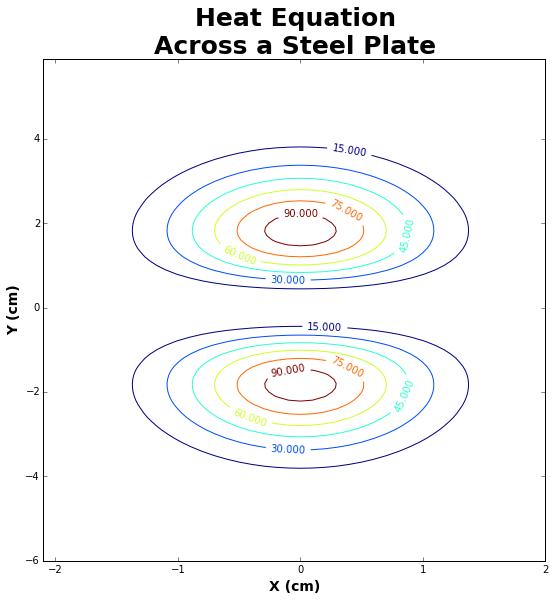

In [36]:
X,Y,Z,dx,dy,M = heatEqn()                                                        # Get heat data

fig, ax = plt.subplots(figsize=(9, 9))                                           # Create a figure and set the size

cPlt = ax.contour(X, Y, Z)                                                       # Create the contour plot
ax.clabel(cPlt)                                                                  # Add labels to each contour level

ax.set_title(u'Heat Equation\nAcross a Steel Plate', fontsize=25, weight='bold') # Set plot title
ax.set_xlabel('X (cm)', fontsize=14, weight='bold')                              # Set xaxis label
ax.set_ylabel('Y (cm)', fontsize=14, weight='bold')                              # Set yaxis label

plt.show()

The default floating point representation shows three significant digits and our levels are basically intergers. While there are many ways to change this behavior we will create a class to do it manually for us. The purpose of doing this is to demonstrate that you have complete control on how you create your visualizations.

In [31]:
# Define a class that forces representation of float to look a certain way
# namely remove trailing zeros 
class nf(float):
     def __repr__(self):
         str = '%.1f' % (self.__float__(),)
         if str[-1]=='0':
             return '%.f' % self.__float__()
         else:
             return '%.1f' % self.__float__()


Using our new class to modify our labels we will create a filled contour plot, give it a new color map and overlay our original countour plot ontop of it. In addition we will increase the contour lines widths, create our new countour level labels and add the approprate units to them.

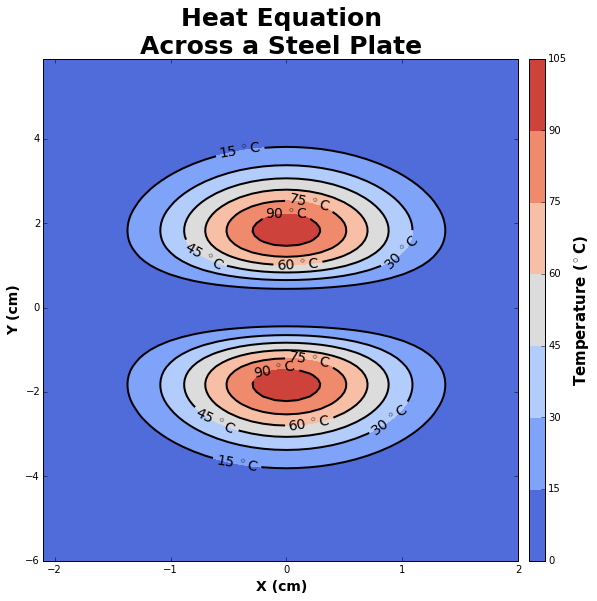

In [56]:
X,Y,Z,dx,dy,M = heatEqn()                                                      # Get heat data

fig, ax = plt.subplots(figsize=(9, 9))                                         # Create a figure and set the size

cfPlt = ax.contourf(X, Y, Z, cmap='coolwarm')                                  # Create the filled contour plot and change 
                                                                               # the colormap.

cPlt = ax.contour(X, Y, Z,colors='k', linewidths=2)                            # Now add the original contour map with 
                                                                               # thicker lines

cPlt.levels = [nf(val) for val in cPlt.levels]                                 # Recast level labels with our new class
fmt = '%r $^\circ$C'                                                           # Add the temperature units to the labels
ax.clabel(cPlt, cPlt.levels, colors='k', inline=True, fmt=fmt, fontsize=14, weight='bold') # Add our new contour labels

ax.set_title('Heat Equation\nAcross a Steel Plate', fontsize=25, weight='bold')# Set plot title
ax.set_xlabel('X (cm)', fontsize=14, weight='bold')                            # Set xaxis label
ax.set_ylabel('Y (cm)', fontsize=14, weight='bold')                            # Set yaxis label

div = mal(ax)                                                                  # Divide our original axes to add new item
cax = div.append_axes("right", size="3.5%", pad=0.15)                          # Add new axes attached to our original
cbar = plt.colorbar(cfPlt, cax=cax)                                            # Attach a colorbar to the new axes
cbar.set_label('Temperature ($^\circ$C)',size = 15, weight = 'bold')           # Give the colorbar a title

plt.show()

<h2> - Quiver Plots</h2>

<p>Quiver plots, also called vector plots, arrow plots and other names, are used to show the <i>'flow'</i> of the data. In this case the flow of heat across the surface. For this we will make use of the orignal X and Y grid data. In addition we will use the partial derivitives and the magnitude of the gradient vector to create the quiver plots.</p>

We will again start off with a vanilla plot and evolve it to something more useful.

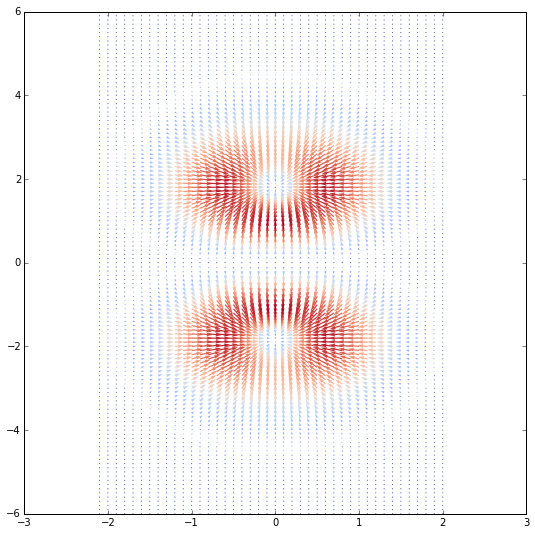

In [42]:
X,Y,Z,dx,dy,M = heatEqn()                                                       # Get heat data

fig, ax = plt.subplots(figsize=(9, 9))                                          # Create a figure and set the size

q=ax.quiver(X,Y,dx,dy,M, cmap='coolwarm')                                       # Create quiver plot and change the colormap

There are a lot of quiver arrows in the above plot and we often rejoice in that as we can see the flow very nicely. But what if we were more interested in how fast or how hot something became? In this case we have to much data. 
What we can do is just choose say every third data point using 'slicing'. We can then change the widths and size of the quiver arrows using a combination of 'width' and 'scale'. These values will be determined, in this case, by the fractional magnitudes in the x direction. We will also rescale the x-axis to eliminate the extra white space.

(-2, 2)

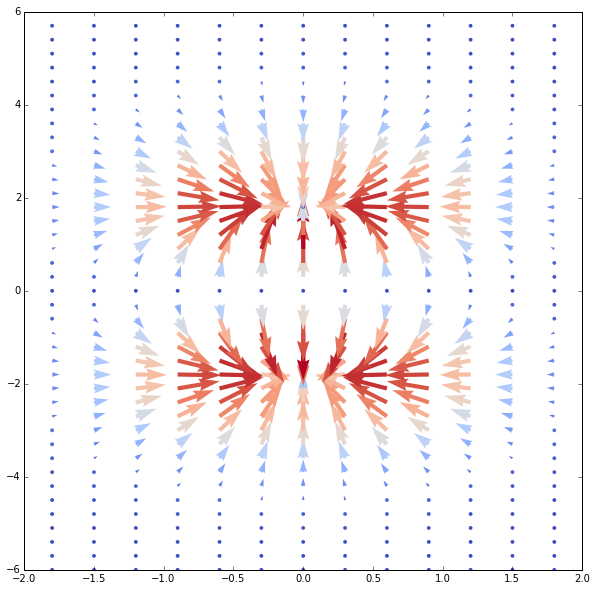

In [46]:
X,Y,Z,dx,dy,M = heatEqn()                                                       # Get heat data

fig, ax = plt.subplots(figsize=(10, 10))                                        # Create a figure and set the size

gptI = 3                                                                        # Grid point plotting interval

#Create the new quiver plot
q = ax.quiver(X[::gptI, ::gptI], Y[::gptI, ::gptI], dx[::gptI, ::gptI], dy[::gptI, ::gptI], M[::gptI,::gptI], 
              cmap='coolwarm', units='x', width=0.03, scale=250)

ax.set_xlim(-2,2)                                                               # Adjust the xaxis bondary limits

We have now created a nice contour plot and a nice quiver plot. We can take our visual information to the next level by combining the two types of plots into one combined plot. We will also add our title, labels and colorbar.

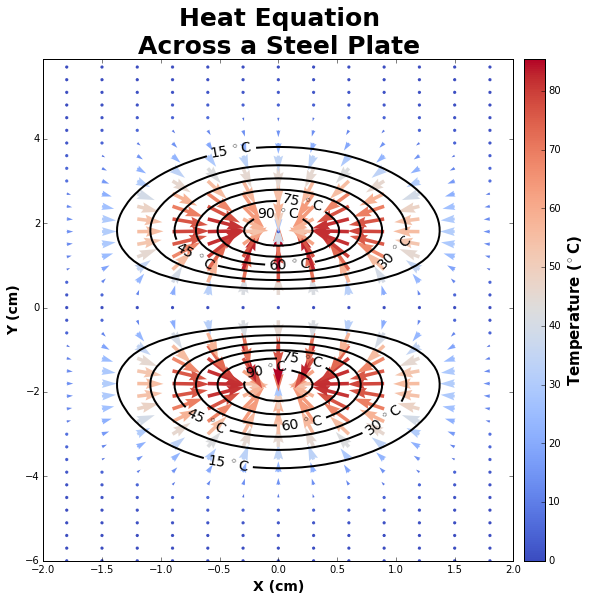

In [127]:
X,Y,Z,dx,dy,M = heatEqn()                                                       # Get heat data
 
fig, ax = plt.subplots(figsize=(9, 9))                                          # Create a figure and set the size

gptI = 3                                                                        # Grid point plotting interval

#Create the new quiver plot
q = ax.quiver(X[::gptI, ::gptI], Y[::gptI, ::gptI], dx[::gptI, ::gptI], dy[::gptI, ::gptI], M[::gptI,::gptI], 
              cmap='coolwarm', units='x', width=0.03, scale=250)

# Now add our contours ontop of the quiver plot
cPlt = ax.contour(X, Y, Z,colors='k', linewidths=2)                            # Now add the original contour map with 
                                                                               # thicker lines

cPlt.levels = [nf(val) for val in cPlt.levels]                                 # Recast level labels with our new class
fmt = '%r $^\circ$C'                                                           # Add the temperature units to the labels
ax.clabel(cPlt, cPlt.levels, colors='k', inline=True, fmt=fmt, fontsize=14, weight='bold') # Add our new contour labels

ax.set_title('Heat Equation\nAcross a Steel Plate', fontsize=25, weight='bold') # Set plot title
ax.set_xlabel('X (cm)', fontsize=14, weight='bold')                             # Set xaxis label
ax.set_ylabel('Y (cm)', fontsize=14, weight='bold')                             # Set yaxis label

div = mal(ax)                                                                   # Divide our original axes to add new item
cax = div.append_axes("right", size="4.5%", pad=0.15)                           # Add new axes attached to our original
cbar = plt.colorbar(q, cax=cax)                                                 # Attach a colorbar to the new axes
cbar.set_label('Temperature ($^\circ$C)',size = 15, weight = 'bold')            # Give the colorbar a title

ax.set_xlim(-2,2)                                                              # Adjust the xaxis bondary limits

plt.show()

<h2> - Streamline Plots</h2>

Another type of flow plot is a 'Streamline' plot which is created using the same information used for quivers but instead of creating a bunch of arrows an interploated curve is created to shows the flow field.
In the example below we will replace the quiver plot in the above example with a streamline plot.

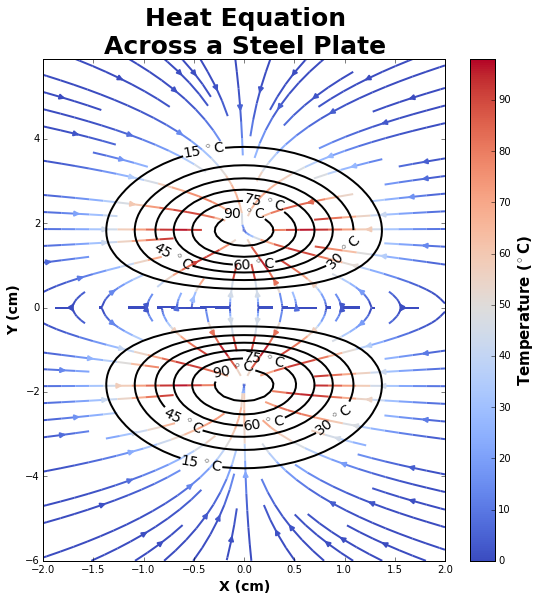

In [128]:
X,Y,Z,dx,dy,M = heatEqn()                                                       # Get heat data

fig, ax = plt.subplots(figsize=(9, 9))                                          # Create a figure and set the size
  
sp=ax.streamplot(X, Y, dx, dy, color=M, cmap='coolwarm', linewidth=2)           # Create the streamline plot

# Now add our contours ontop of the quiver plot
cPlt = ax.contour(X, Y, Z,colors='k', linewidths=2)                             # Now add the original contour map with 
                                                                                # thicker lines

cPlt.levels = [nf(val) for val in cPlt.levels]                                  # Recast level labels with our new class
fmt = '%r $^\circ$C'                                                            # Add the temperature units to the labels
ax.clabel(cPlt, cPlt.levels, colors='k', inline=True, fmt=fmt, fontsize=14, weight='bold') # Add our new contour labels

ax.set_title('Heat Equation\nAcross a Steel Plate', fontsize=25, weight='bold') # Set plot title
ax.set_xlabel('X (cm)', fontsize=14, weight='bold')                             # Set xaxis label
ax.set_ylabel('Y (cm)', fontsize=14, weight='bold')                             # Set yaxis label

cbar = plt.colorbar(pcPlt)                                                      # Attach a colorbar to the new axes
cbar.set_label('Temperature ($^\circ$C)',size = 15, weight = 'bold')            # Give the colorbar a title

ax.set_xlim(-2,2)                                                               # Adjust the xaxis bondary limits
plt.show()

<h2> - pcolor Plots</h2>

Sometimes you want to visualize the literal values of the data. This is actually really easy as r,g,b (red, green blue) can equal x,y,z. It is this very basic concept that has taken graphics from just visualizations and turned them into incredible multi-processing beasts!

For our example we will take the value of the Z data at position [X, Y] and plot it with pcolormesh. 

Note you can do the same thing with imshow() and pcolormesh(). The main differences between them are where the origin is and the type of object returned. Also note that in most istances pcolormesh will calculate faster then pcolor.

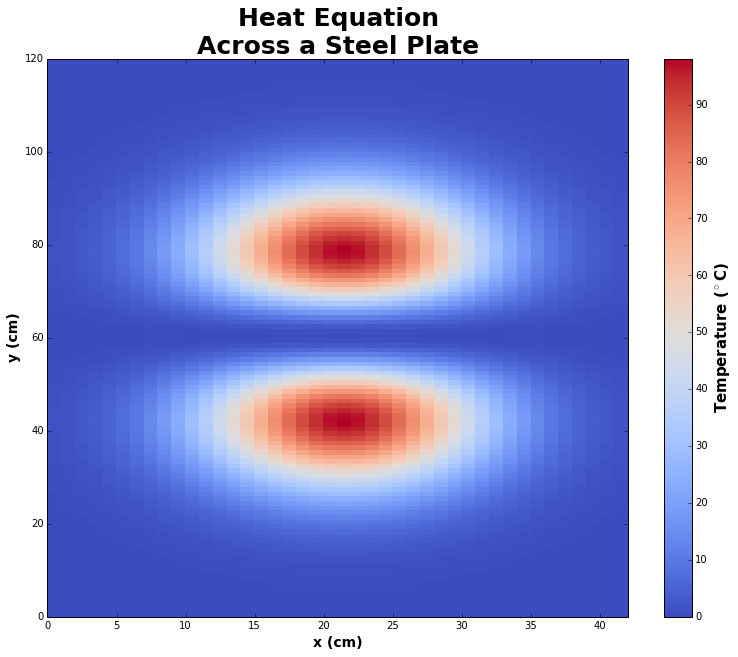

In [129]:
X,Y,Z,dx,dy,M = heatEqn()                                                       # Get heat data

fig, ax = plt.subplots(figsize=(13, 10))                                        # Create a figure and set the size
pcPlt = ax.pcolor(Z, cmap='coolwarm')                                           # Create pcolor plot
ax.set_xlim(0,42)                                                               # Set the x-axis boundaries   

cbar = plt.colorbar(pcPlt)                                                      # Attach a colorbar to the new axes
cbar.set_label('Temperature ($^\circ$C)',size = 15, weight = 'bold')            # Give the colorbar a title

ax.set_title('Heat Equation\nAcross a Steel Plate', fontsize=25, weight='bold') # Set plot title
ax.set_xlabel('x (cm)', fontsize=14, weight='bold')                             # Set xaxis label
ax.set_ylabel('y (cm)', fontsize=14, weight='bold')                             # Set yaxis label

plt.show()


<h1> 3D Plots</h1> 
<h2> - 3D Contour Plots</h2>
So far we have only looked at 2D plots and only crudely attempted to visualize the information in three dimensions even though we have 3D data. (We assume that the higher the temperature the higher the temperature peak will be.)

We will first look at 3D contour plots and as previously we will evolve our results.

The most important thing to know with 3D plots is that you need to change the axes from 2D to 3D. We do this by getting a handle to the current axes (gca) and set it to a 3D projection, (fig.gca(projection='3d')).

For 3D Contour plots we do things the same as before only this time we add in the height data (Z) into the plot.

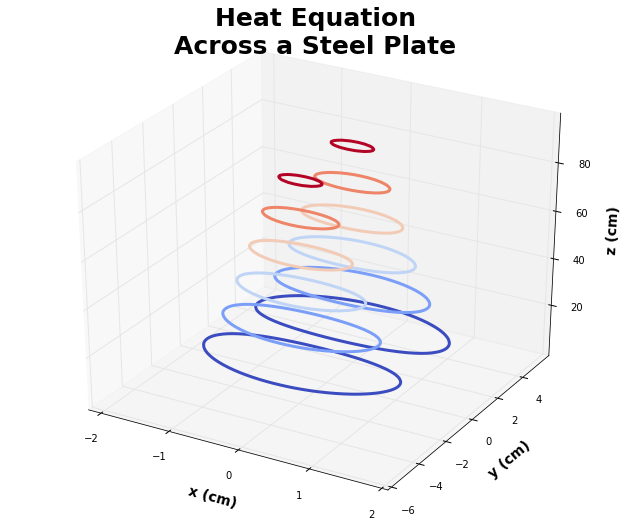

In [130]:
from mpl_toolkits.mplot3d import axes3d                                         # Get axes3d for 3D plotting

X,Y,Z,dx,dy,M = heatEqn()                                                       # Get heat data

fig = plt.figure(figsize=(11, 9))                                               # Create new figure
ax = fig.gca(projection='3d')                                                   # Set the axes projection to 3D

c3plt = ax.contour(X, Y, Z, linewidths=3, cmap='coolwarm')                      # Create 3D contours

ax.set_title('Heat Equation\nAcross a Steel Plate', fontsize=25, weight='bold') # Set plot title
ax.set_xlabel('x (cm)', fontsize=14, weight='bold')                             # Set xaxis label
ax.set_ylabel('y (cm)', fontsize=14, weight='bold')                             # Set yaxis label
ax.set_zlabel('z (cm)', fontsize=14, weight='bold')                             # Set zaxis label

plt.show()


<h2> - 3D Meshs</h2>
Contours may be of value but you usually want to create a surface mesh of the data to see what the gradient surface looks like. We can do this using the plot_surface() function. The 'rstride' and 'cstride' give the interval stride for creating the mesh. The smaller the stride the higher resolution the mesh. Note these strides are integer values >= 1.

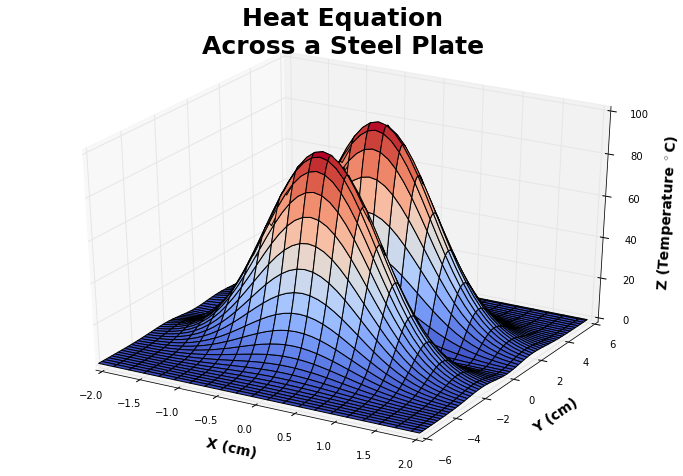

In [131]:
X,Y,Z,dx,dy,M = heatEqn()                                                       # Get heat data

fig = plt.figure(figsize=(12, 8))                                               # Create new figure
ax = fig.gca(projection='3d')                                                   # Set the axes projection to 3D

ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap='coolwarm')                 # Create 3D surface plot
ax.set_xlim(-2,2)                                                               # Set xaxis boundaries
ax.set_ylim(-6,6)                                                               # Set yaxis boundaries
ax.set_zlim(0, 100)                                                             # Set zaxis boundaries

ax.set_title(u'Heat Equation\nAcross a Steel Plate', fontsize=25, weight='bold')# Set plot title
ax.set_xlabel('X (cm)', fontsize=14, weight='bold')                             # Set xaxis label
ax.set_ylabel('Y (cm)', fontsize=14, weight='bold')                             # Set yaxis label
ax.set_zlabel(u'Z (Temperature $^\circ$C)', fontsize=14, weight='bold')         # Set zaxis label

plt.show()


<h2> - Putting it all together</h2>
We can take our 3D visualization one step further by adding contour information to the plot. Not only can we create the contours based on Z-values but we can do the same to the X and Y-data as well. We can add these to the mesh by setting an axis direction to plot against and an offset from the origin. We must make sure we set the X,Y,Z limits to match our offsets.

We can also add a transparency to the mesh, and any other plot, so we can partially see through it.

NOTE: I currently don't have an easy answer on how to fix the contour lines on for Y. There is a solution I just can't remember how I deal with it. Normally using the hold='on'/'off' works but not in this example and it maybe a notebook issue.

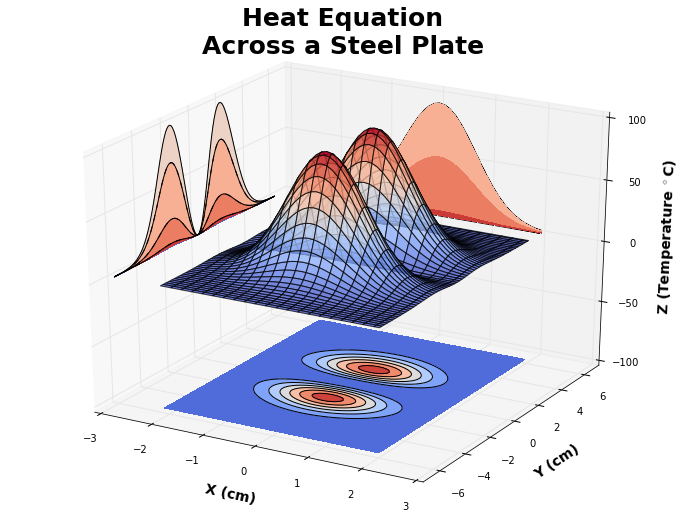

In [136]:
X,Y,Z,dx,dy,M = heatEqn()                                                        # Get heat data

fig = plt.figure(figsize=(12, 9))                                                # Create new figure
ax = fig.gca(projection='3d')                                                    # Set the axes projection to 3D
#azim, elev = ax.azim, ax.elev
ax.view_init(ax.elev-5, ax.azim)                                                 # Set the camera viewing angle
                                                                                 # (elevation-5, azimuth) in degrees 

ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='coolwarm')

cset = ax.contourf(X, Y, Z, zdir='x', offset=-3, cmap='coolwarm')                # Create filled contour plot for xaxis
cset = ax.contourf(X, Y, Z, zdir='y', offset=7, cmap='coolwarm')                 # Create filled contour plot for yaxis
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')              # Create filled contour plot for zaxis

cPlt = ax.contour(X, Y, Z, zdir='x', offset=-3, colors='k', linewidths=1)        # Add the contour lines to xaxis
cPlt = ax.contour(X, Y, Z, zdir='y', offset=7, colors='k', linewidths=2)         # Add the contour lines to yaxis
cPlt = ax.contour(X, Y, Z, zdir='z', offset=-100, colors='k', linewidths=1)      # Add the contour lines to zaxis 

ax.set_xlim(-3,3)                                                                # Set xaxis boundaries
ax.set_ylim(-7,7)                                                                # Set yaxis boundaries
ax.set_zlim(-100, 100)                                                           # Set zaxis boundaries

ax.set_title(u'Heat Equation\nAcross a Steel Plate', fontsize=25, weight='bold') # Set plot title
ax.set_xlabel('X (cm)', fontsize=14, weight='bold')                              # Set xaxis label
ax.set_ylabel('Y (cm)', fontsize=14, weight='bold')                              # Set yaxis label
ax.set_zlabel(u'Z (Temperature $^\circ$C)', fontsize=14, weight='bold')          # Set zaxis label

plt.show()

<center><h3>Is this a good plot?</h3></center>

<h2> - 3D Time Series Plotting</h2>
We often want to plot information from a series of timesteps. We can do this in two basic ways, as a single plot or as an animation. We will look at both.

For this example we won't be going back and rewritting the original function to actually solve the PDE and partial derivities symbolically as a time evolving solution. Thats ugly and actually semi-boing. Instead we will look at the famous Lorenz Attractor, a 3D chaotic non-linear ODE 

The process of creating this iterative time series plot we will calulate the x,y,z solutions and save them as a set of arrays and then use plot() to plot the resultant arrays.

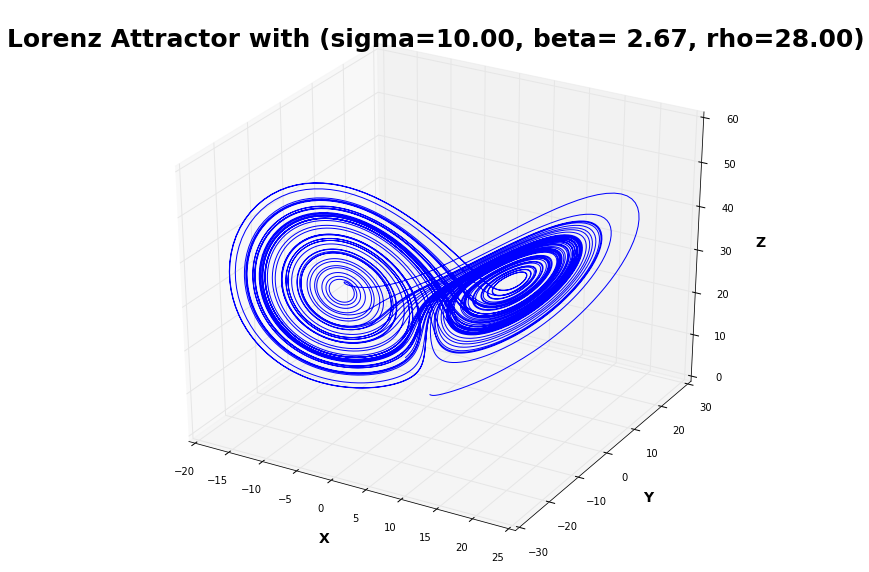

In [100]:
# Lorenz attractor fxn
def lorenz(x, y, z, sigma=10., beta=8./3, rho=28.):
    dx = sigma*(y-x)
    dy = rho*x-y-x*z
    dz = x*y-beta*z
    return dx, dy, dz

dt = 0.005                                                     # Time step interval           
nSteps = 15000                                                 # Number of time steps
xs = np.zeros((nSteps + 1,))                                   # Pre-allocate and init xaxis data
ys = np.zeros((nSteps + 1,))                                   # Pre-allocate and init yaxis data
zs = np.zeros((nSteps + 1,))                                   # Pre-allocate and init zaxis data

xs[0], ys[0], zs[0] = (0., 1., 1.05)                           # Set initial condition values
sigma=10.; beta=8./3; rho=28.

for i in range(nSteps) :                                       # Iterate through each time step
    dx, dy, dz = lorenz(xs[i], ys[i], zs[i], sigma, beta, rho) # Calc the Lorenz eqn derivitives
    xs[i + 1] = xs[i] + (dx * dt)                              # Add new data point to x data      
    ys[i + 1] = ys[i] + (dy * dt)                              # Add new data point to y data
    zs[i + 1] = zs[i] + (dz * dt)                              # Add new data point to z data

fig = plt.figure(figsize=(12, 10))                             # Create new figure
ax = fig.gca(projection='3d')                                  # Set the axes projection to 3D

ax.plot(xs, ys, zs, 'b')
szTitle = 'Lorenz Attractor with (sigma=%5.2f, beta=%5.2f, rho=%5.2f)' % (sigma,beta,rho) # Plot title
ax.set_title(szTitle, fontsize=25, weight='bold')              # Set plot title
ax.set_xlabel('X', fontsize=14, weight='bold')                 # Set xaxis label
ax.set_ylabel('Y', fontsize=14, weight='bold')                 # Set yaxis label
ax.set_zlabel('Z', fontsize=14, weight='bold')                 # Set zaxis label

plt.show()